In [110]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

plt.rcParams["font.size"] = 22
plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (15, 5)

# Measuring the Line's Shape

line off / line on

In [104]:
# reading in data
on_data = np.load('on_line.npy')
off_data_power = np.load('off_line.npy')

In [105]:
# raspberry pi sampling frequency 
sample_freq = 2.2 #MHz

# time step
dt = 1/2.2 # micro second

In [106]:
def calc_avg_power(data, shape=2048):
    power_data = np.abs(np.fft.fft(data))**2
    
    if shape != 2048: # reshaping data
        power_data = power_data.reshape(-1, shape)
    
    mean_power = np.mean(power_data, axis=0)
    freqs = np.fft.fftfreq(shape, dt)
    
    return freqs, mean_power

In [107]:
on_freqs, on_data_power = calc_avg_power(on_data)

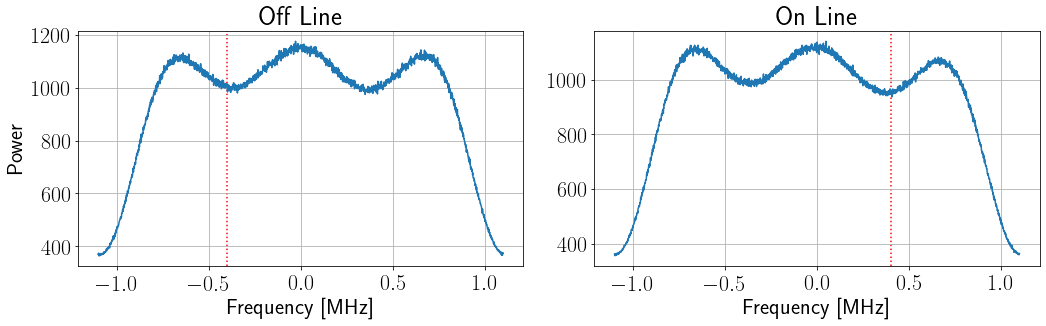

In [120]:
# OFF LINE DATA
fig, ax = plt.subplots(1, 2)

ax[0].plot(np.fft.fftshift(on_freqs), np.fft.fftshift(off_data_power))
# ax[0].set_xlim(-0.45, -0.35)
# ax[0].set_ylim(975, 1050)
ax[0].axvline(-0.4, c='red', linestyle='dotted', zorder=0)

# axins = zoomed_inset_axes(ax[0], 0.5) # zoom = 6
# axins.plot(np.fft.fftshift(on_freqs), np.fft.fftshift(off_data_power))

ax[0].grid()
ax[0].set_title('Off Line')
ax[0].set_xlabel('Frequency [MHz]')
ax[0].set_ylabel('Power')

ax[1].plot(np.fft.fftshift(on_freqs), np.fft.fftshift(on_data_power))
# ax[1].set_xlim(0.45, 0.35)
# ax[1].set_ylim(915, 990)
ax[1].axvline(0.4, c='red', linestyle='dotted', zorder=0)
ax[1].grid()
ax[1].set_title('On Line')
ax[1].set_xlabel('Frequency [MHz]')

plt.tight_layout()
plt.savefig('on_off_power.jpg')

# MAKE ZOOM IN PLOTS

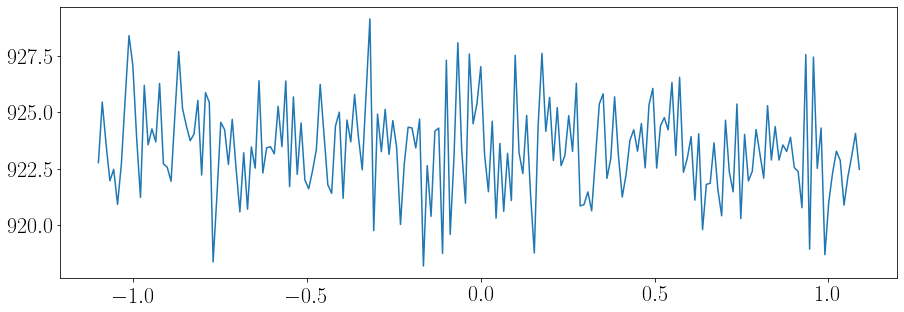

In [126]:
avg_channels = 200

freqs, on_data_power = calc_avg_power(on_data, shape=avg_channels)
plt.plot(np.fft.fftshift(freqs), np.fft.fftshift(on_data_power))

# freqs

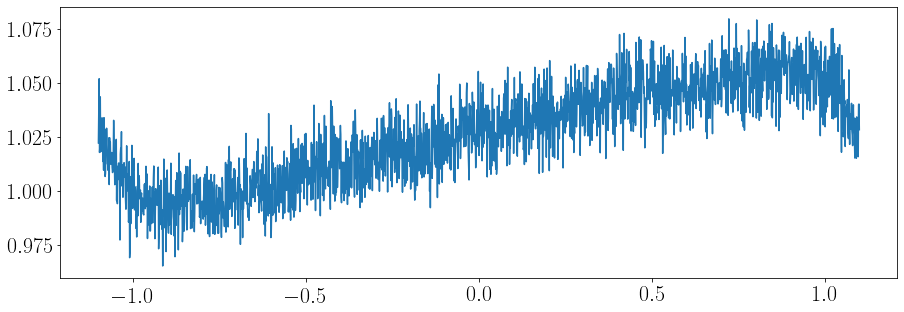

In [82]:
plt.plot(np.fft.fftshift(freqs), np.fft.fftshift(off_data_power/on_data_power))

# Measuring the Line Intensity

In [ ]:
# reading in data
cold_data = np.load('on_line.npy')
human_data = np.load('off_line.npy')